<a href="https://colab.research.google.com/github/2303A52161/STML_2303A52161/blob/main/my_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
eb=pd.read_csv('/content/drive/MyDrive/My_Project/Household energy bill data 1.csv')
eb.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


In [ ]:
eb.tail(5)

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
995,3,0,991.31,0,1,0,12687.26,1,1,655.870111
996,2,5,847.97,0,1,0,39502.92,0,0,354.472693
997,2,4,660.94,1,0,0,10145.17,0,1,568.660550
998,1,1,814.75,0,1,1,15535.05,0,1,653.423314
999,1,6,835.43,0,0,0,22204.00,0,1,537.801005


In [ ]:
eb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_rooms           1000 non-null   int64  
 1   num_people          1000 non-null   int64  
 2   housearea           1000 non-null   float64
 3   is_ac               1000 non-null   int64  
 4   is_tv               1000 non-null   int64  
 5   is_flat             1000 non-null   int64  
 6   ave_monthly_income  1000 non-null   float64
 7   num_children        1000 non-null   int64  
 8   is_urban            1000 non-null   int64  
 9   amount_paid         1000 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


##Data cleaning


In [ ]:
X = eb.drop('amount_paid', axis=1)
y = eb['amount_paid']

In [ ]:
eb.columns

Index(['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat',
       'ave_monthly_income', 'num_children', 'is_urban', 'amount_paid'],
      dtype='object')

Null values and duplicate values were check and removed if found

In [ ]:
eb.isnull().sum()

,0
num_rooms,0
num_people,0
housearea,0
is_ac,0
is_tv,0
is_flat,0
ave_monthly_income,0
num_children,0
is_urban,0
amount_paid,0


In [ ]:
eb.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
eb.describe()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.962000,4.897000,794.703420,0.376000,0.798000,0.477000,24684.986550,1.078000,0.608000,600.396359
std,1.030348,2.007591,147.771736,0.484622,0.401693,0.499721,9678.228224,0.934232,0.488441,181.406210
min,-1.000000,-1.000000,244.400000,0.000000,0.000000,0.000000,-1576.440000,0.000000,0.000000,87.851850
25%,1.000000,4.000000,691.037500,0.000000,1.000000,0.000000,18036.762500,0.000000,0.000000,475.065141
50%,2.000000,5.000000,789.970000,0.000000,1.000000,0.000000,24742.575000,1.000000,1.000000,598.331726
75%,3.000000,6.000000,892.955000,1.000000,1.000000,1.000000,31402.357500,2.000000,1.000000,729.930489
max,5.000000,11.000000,1189.120000,1.000000,1.000000,1.000000,56531.080000,4.000000,1.000000,1102.994109


##density of dataset

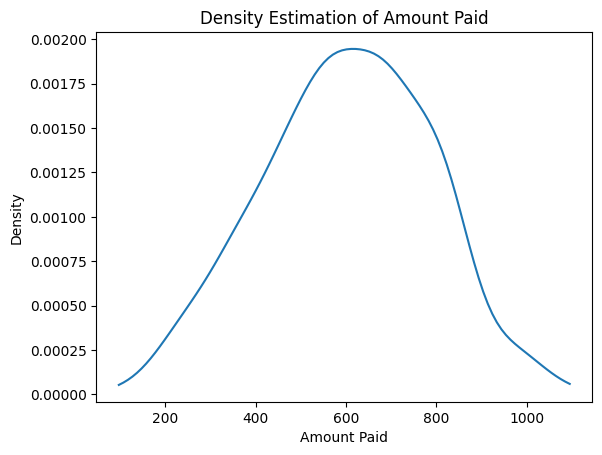

In [ ]:
from scipy.stats import gaussian_kde
eb_sample = eb.sample(frac=0.5, random_state=42)
density = gaussian_kde(eb_sample['amount_paid'])
x_vals = np.linspace(eb_sample['amount_paid'].min(), eb_sample['amount_paid'].max(), 100)
plt.plot(x_vals, density(x_vals))
plt.xlabel('Amount Paid')
plt.ylabel('Density')
plt.title('Density Estimation of Amount Paid')
plt.show()

#Data Visualization

# Histograms for all numeric columns

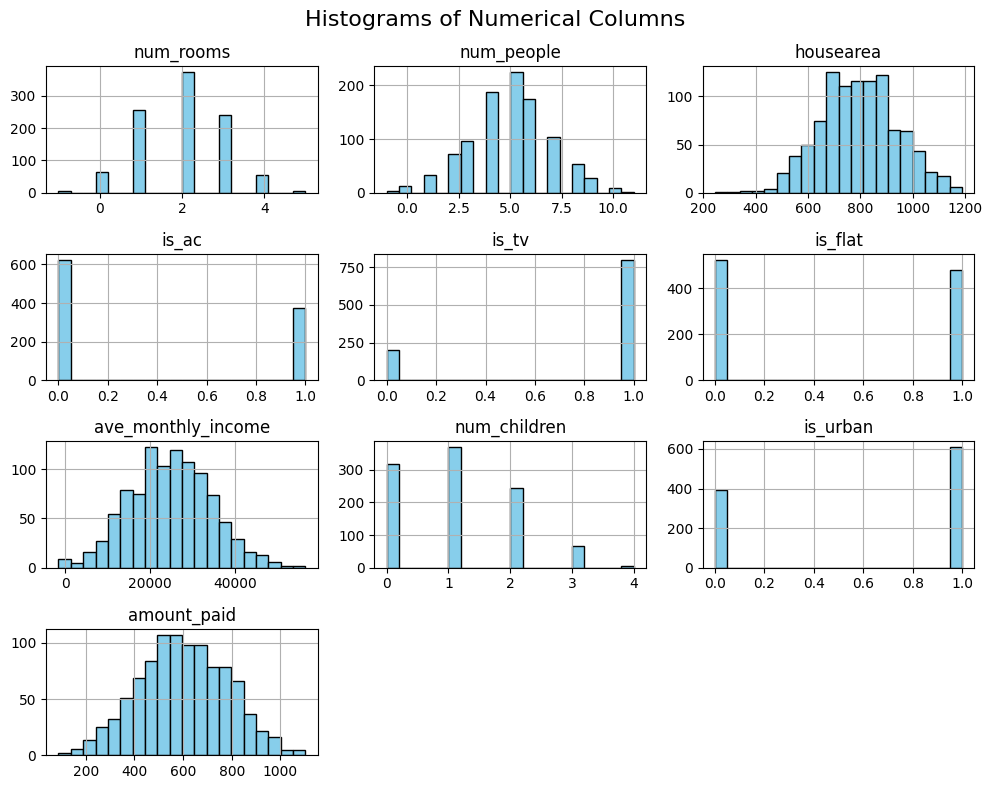

In [ ]:
eb.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.tight_layout()
plt.show()

# Boxplot to check for outliers


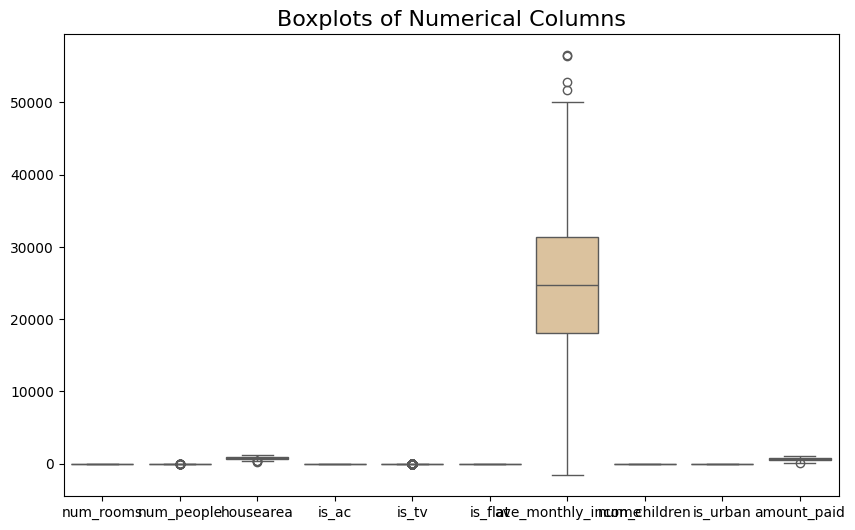

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=eb, palette='Set2')
plt.title('Boxplots of Numerical Columns', fontsize=16)
plt.show()

# Pairplot for numerical relationships

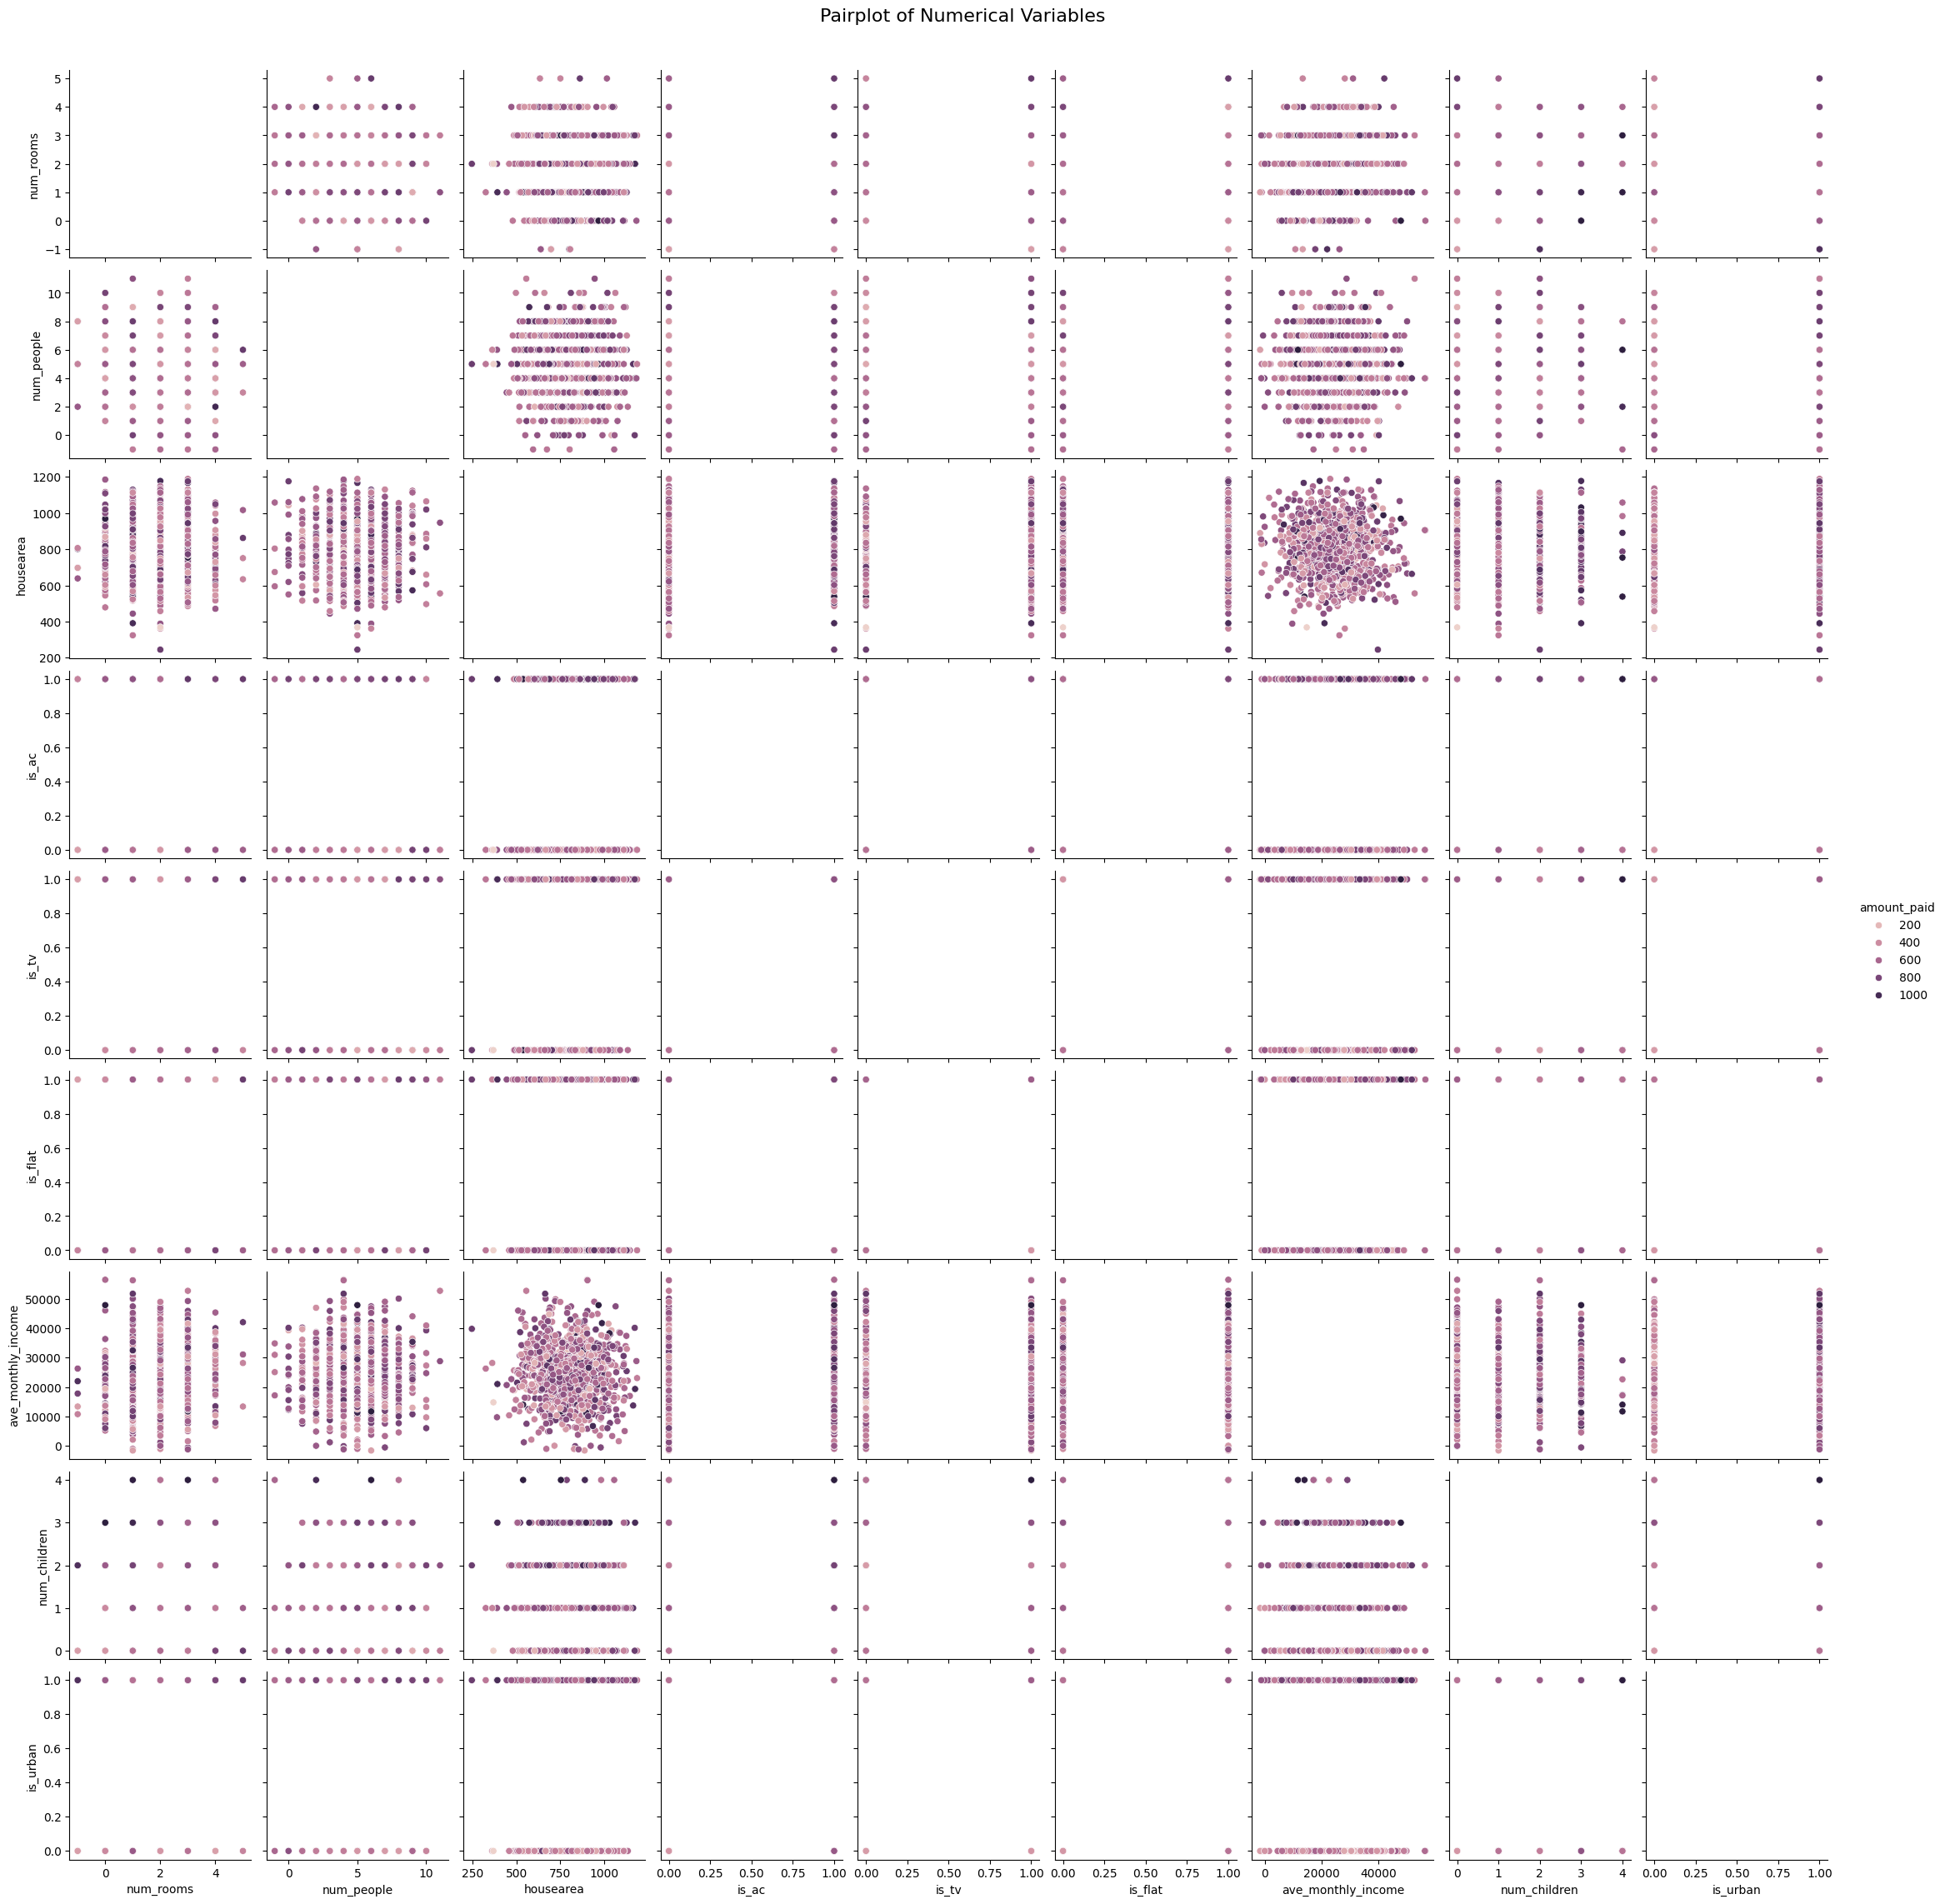

In [ ]:
sns.pairplot(eb, hue='amount_paid', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', fontsize=16, y=1.02)
plt.show()

# Bar chart for a categorical variable

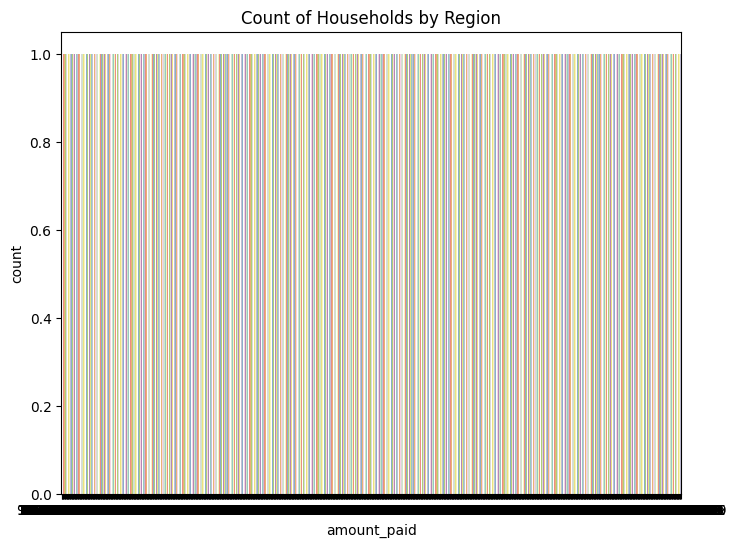

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=eb, x='amount_paid', palette='Set3')
plt.title('Count of Households by Region')
plt.show()

# Boxplot for numerical data across categories

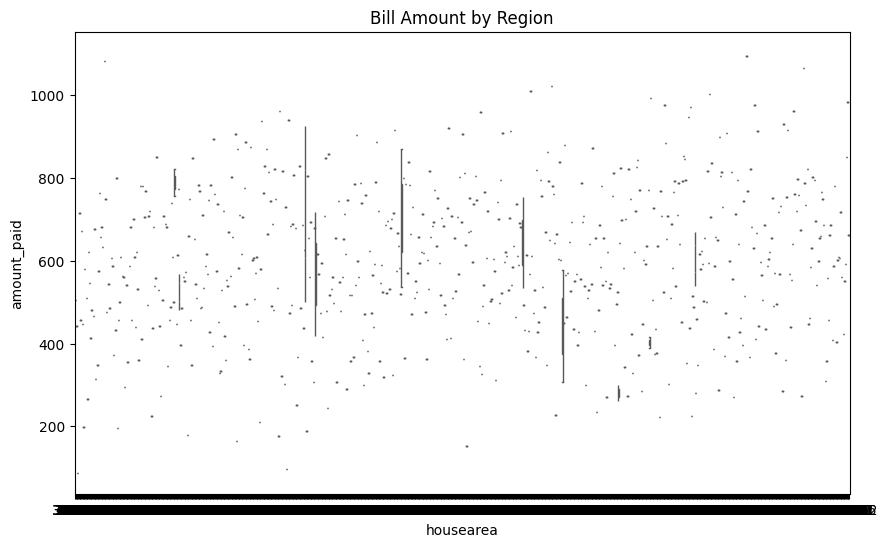

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=eb, x='housearea', y='amount_paid', palette='Set2')
plt.title('Bill Amount by Region')
plt.show()

#split the Traning and teasting data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=70)
print("X_train:",X_train.shape)
print("")
print("y_test",y_test.shape)
print("")
print("X_test",X_test.shape)
print("")
print("y_tarin",y_train.shape)


X_train: (700, 9)

y_test (300,)

X_test (300, 9)

y_tarin (700,)


In [ ]:
X = eb.drop('amount_paid', axis=1)
y = eb['amount_paid']
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1000, 9)
Shape of y: (1000,)


 # LinearRegression model


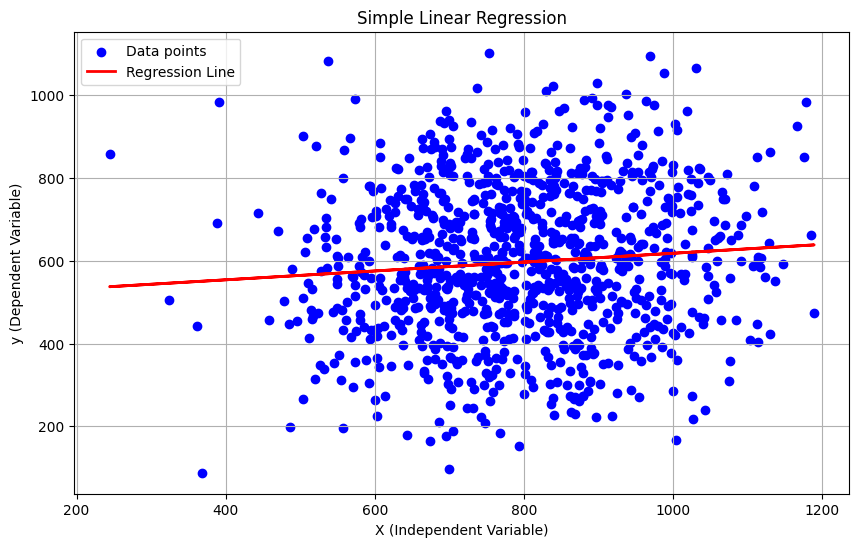

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = eb[['housearea']]
y = eb['amount_paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=70)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test_scaled)
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = eb.drop('amount_paid', axis=1)
y = eb['amount_paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=70)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)


# Evaluate the model

In [ ]:

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
mae= mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
r2 = r2_score(y_test, y_pred)
print(f"R-squared : {r2}")

Mean Squared Error: 4043.510698238467
Root Mean Squared Error: 63.58860509744232
Mean Absolute Error: 54.43378725409043
R-squared (Accuracy): 0.8697596876250943


##SVM(Support vector Machine)

In [ ]:
from sklearn.svm import SVR

X = eb.drop(['amount_paid'],axis=1)
y = eb['amount_paid']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=70)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)
y_pred_svm = model.predict(X_test_scaled)

# Evaluate the SVM model

In [ ]:
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"Mean Squared Error: {mse_svm}")
rmse_svm = np.sqrt(mse_svm)
print(f"Root Mean Squared Error: {rmse_svm}")
mae_svm = mean_absolute_error(y_test, y_pred_svm)
print("Mean Absolute Error:", mae_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f"R-squared : {r2_svm}")

Mean Squared Error: 26074.462883339977
Root Mean Squared Error: 161.47588947994674
Mean Absolute Error: 130.96367987118975
R-squared : 0.1601490772823949


##visuilzation to SVM

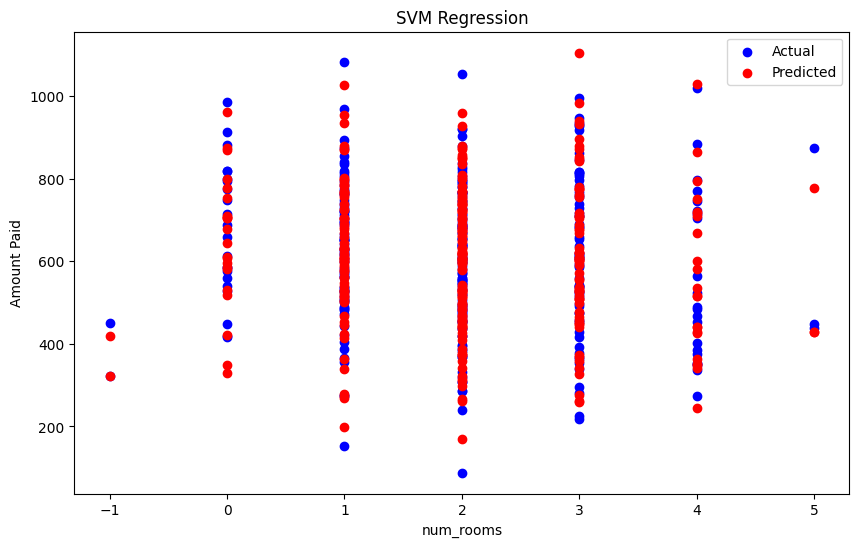

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


if len(X.columns) >=2:
  plt.figure(figsize=(10, 6))
  plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')
  plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted')
  plt.xlabel(X.columns[0])
  plt.ylabel('Amount Paid')
  plt.title('SVM Regression')
  plt.legend()
  plt.show()
else:
  print("Visualization requires at least two features for plotting.")

#Lasso-Regularization

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
# print(y_pred)

### Evaluate the Lasso-Regularization model

In [ ]:
mse_lasso = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print("Root Mean Squared Error:", rmse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("Mean Absolute Error:", mae_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("R-squared:", r2_lasso)

Mean Squared Error: 4043.510698238467
Root Mean Squared Error: 63.54936617862286
Mean Absolute Error: 54.4214500115866
R-squared: 0.8699203740329734


#Ridge-Regularization

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
Ridge = Ridge(alpha=0.1)
Ridge.fit(X_train, y_train)
y_pred_ridge = Ridge.predict(X_test)
# print(y_pred)


### Evaluate the Ridge-Regularization model

In [ ]:
mse1 = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error:", mse1)
mae1= mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absolute Error:", mae1)
rmse1 = mean_squared_error(y_test, y_pred_ridge, squared=False)
print("Root Mean Squared Error:", rmse1)
r21 = r2_score(y_test, y_pred_ridge)
print("R-squared:", r21)

Mean Squared Error: 4042.64804519573
Mean Absolute Error: 54.428610453749265
Root Mean Squared Error: 63.58182165678906
R-squared: 0.869787473430584


##KNN(K-nearest Neighbor) Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=70)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)


### Evaluate the KNN model

In [ ]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
print("Root Mean Squared Error:", rmse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print("Mean Absolute Error:", mae_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"R-squared (Accuracy): {r2_knn}")

Mean Squared Error: 6768.67651709108
Root Mean Squared Error: 82.27196677539123
Mean Absolute Error: 66.60984991407999
R-squared (Accuracy): 0.7819828832567017


#Visualization for KNN Regression

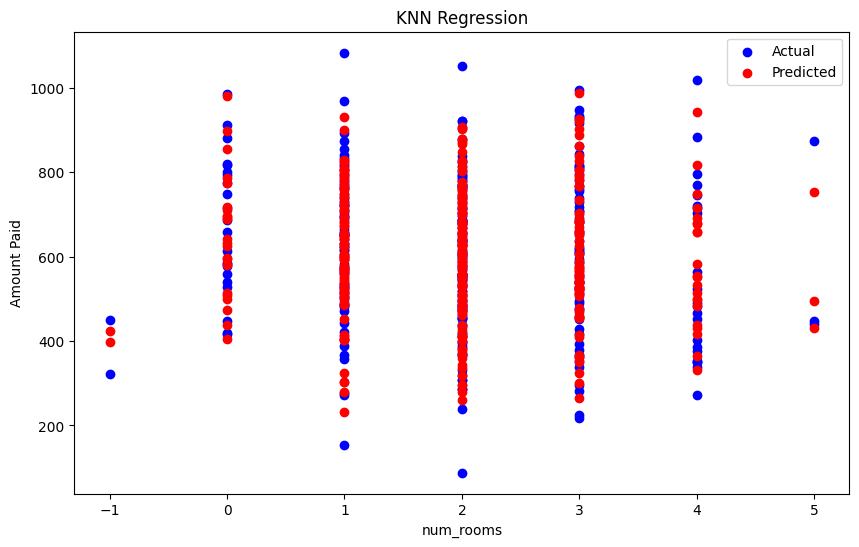

In [ ]:
if len(X.columns) >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')
    plt.scatter(X_test.iloc[:, 0], y_pred_knn, color='red', label='Predicted')
    plt.xlabel(X.columns[0])
    plt.ylabel('Amount Paid')
    plt.title('KNN Regression')
    plt.legend()
    plt.show()
else:
    print("Visualization requires at least two features for plotting.")